In [16]:
import numpy as np
import os
from PIL import Image
from sklearn import metrics

FILES_DIR = os.path.abspath('tmp')

In [17]:
def maxError(originalImage, noiseImage):
    return metrics.max_error(originalImage.flatten(), noiseImage.flatten())

def medianAbsoluteError(originalImage, noiseImage):
    return metrics.mean_absolute_error(originalImage.flatten(), noiseImage.flatten())

def meanSquaredError(originalImage, noiseImage):
    return metrics.mean_squared_error(originalImage.flatten(), noiseImage.flatten())

def rootMeanSquareError(originalImage, noiseImage):
    return metrics.root_mean_squared_error(originalImage.flatten(), noiseImage.flatten())

def normalizedMeanSquareError(originalImage, noiseImage):
    p = metrics.mean_squared_error(originalImage.flatten(), noiseImage.flatten())
    q = metrics.mean_squared_error(originalImage.flatten(), np.zeros(originalImage.size))

    return p / (q + 1e-10)

def jaccardCoefficient(originalImage, noiseImage):
    return metrics.jaccard_score(originalImage.flatten(), noiseImage.flatten(), average = 'micro')



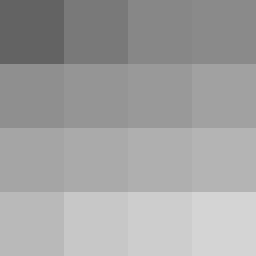

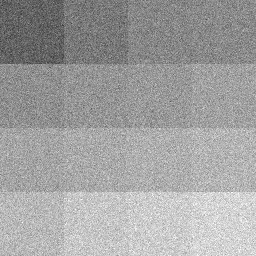

Erro Máximo: 70.0
Erro Médio Absoluto: 12.0137939453125
Erro Médio Quadrático: 226.76025390625
Raiz do Erro Médio Quadrático: 15.058560371398926
Erro Médio Quadrático Normalizado: 0.00836684238047576
Coeficiente de Jaccard: 0.0131795589292478


In [18]:
imageName = 'imageE.bmp'

originalName = imageName
noiseName = imageName.split('.')[0] + '_gaussianNoise.' + imageName.split('.')[1]

originalImage = Image.open(f'{FILES_DIR}/normal/{originalName}')
noiseImage = Image.open(f'{FILES_DIR}/noise/{noiseName}')

originalImage.show()
noiseImage.show()

originalImage = np.asarray(originalImage).astype(np.float32)
noiseImage = np.asarray(noiseImage).astype(np.float32)

print(f'Erro Máximo: {maxError(originalImage, noiseImage)}')
print(f'Erro Médio Absoluto: {medianAbsoluteError(originalImage, noiseImage)}')
print(f'Erro Médio Quadrático: {meanSquaredError(originalImage, noiseImage)}')
print(f'Raiz do Erro Médio Quadrático: {rootMeanSquareError(originalImage, noiseImage)}')
print(f'Erro Médio Quadrático Normalizado: {normalizedMeanSquareError(originalImage, noiseImage)}')
print(f'Coeficiente de Jaccard: {jaccardCoefficient(originalImage, noiseImage)}')